# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [124]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [126]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,512,103,54,107,189,56,11,223,30,25,174,225,729,200,70,0,29,187,201
1,742,90,41,78,145,55,7,138,48,18,138,161,284,158,67,0,1,192,197
2,318,89,37,51,111,54,5,120,56,17,127,138,213,147,82,7,4,181,183
3,632,86,44,70,140,64,6,148,45,19,145,170,322,185,82,10,1,181,183
4,305,86,45,73,152,63,6,149,44,19,145,170,335,176,71,6,1,189,196
5,557,86,40,66,138,59,4,137,49,18,133,162,279,151,74,6,14,186,190
6,706,82,43,70,250,105,55,139,48,18,145,231,289,172,99,4,9,190,199
7,527,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201
8,635,97,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186
9,43,93,37,76,183,63,8,164,40,20,134,191,405,139,67,4,7,192,197


Methods `describe` and `info` deliver some useful information.

In [127]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,413.464481,93.846995,45.058288,82.306011,169.763206,61.757741,8.573770,169.788707,40.695811,20.655738,148.424408,189.244080,444.604736,175.836066,72.448087,6.373406,12.916211,188.912568,195.692168
std,248.358731,8.269320,6.188955,15.650528,33.270875,7.578877,4.503093,33.247839,7.738920,2.599809,14.597527,30.937696,177.297778,32.016056,6.967832,4.946512,9.191609,6.139766,7.351570
min,1.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,190.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,320.000000,152.000000,68.000000,2.000000,6.000000,184.000000,191.000000
50%,411.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,42.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,630.000000,100.000000,50.000000,98.000000,196.000000,66.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,607.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,306.000000,126.000000,55.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,262.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [128]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [129]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

В данных нет пропусков

Нормализовали данные с помощью StandardScaler

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [131]:
### YOUR CODE HERE

In [132]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [134]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs = -1)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.1, 2, 0.1)}

clf = GridSearchCV(estimator = log_reg, param_grid = params, n_jobs = -1)
clf.fit(X_train, y_train)

best_log_reg = clf.best_estimator_
print(best_log_reg)

LogisticRegression(C=1.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)


In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [136]:
y_pred = clf.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.8047138047138047
f1 =  0.8012545243636217


In [137]:
from scikitplot.metrics import plot_roc

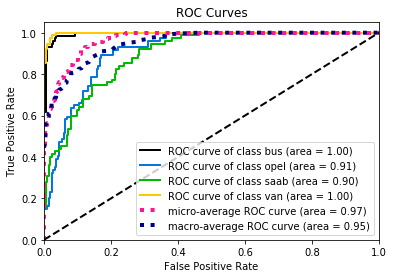

In [138]:
predicted_proba = clf.predict_proba(X_test)

plot_roc(y_test, predicted_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [139]:
### YOUR CODE HERE

In [140]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Text(0, 0.5, 'Variance ratio')

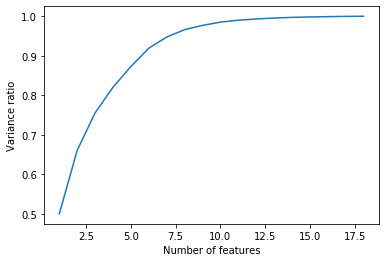

In [141]:
n_components = list(range(1, X_train.shape[1]))

ratio = []
for n in n_components:
    pca = PCA(n)
    pca.fit(X_train)
    
    ratio.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure()
plt.plot(n_components, ratio)
plt.xlabel('Number of features')
plt.ylabel('Variance ratio')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

По полученному графику видно, что для описания большей части дисперсии достаточно 12-13 признаков, потому что график почти перестает изменяться. Выберу 12.

In [142]:
### YOUR CODE HERE

pca = PCA(12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [143]:
### YOUR CODE HERE

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs = -1)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.1, 2, 0.1)}

clf = GridSearchCV(estimator = log_reg, param_grid = params, n_jobs = -1)
clf.fit(X_train_pca, y_train)

best_log_reg_pca = clf.best_estimator_
print(best_log_reg_pca)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)


In [144]:
y_pred = clf.predict(X_test_pca)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.7373737373737373
f1 =  0.7318224954747065


Качество модели немного ухудшилось, как и предплагалось, потому что мы уменьшили размерность признакового пространства

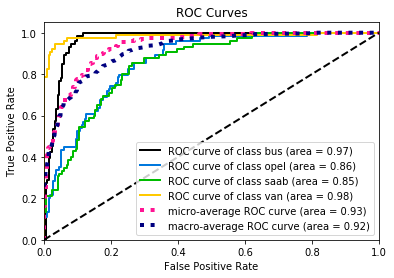

In [145]:
predicted_proba = clf.predict_proba(X_test_pca)

plot_roc(y_test, predicted_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Обучим DecisionTreeClassifier сначала на всех признаках

In [148]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 100))}

clf = GridSearchCV(estimator = tree, param_grid = params, n_jobs = -1)
clf.fit(X_train, y_train)

best_tree = clf.best_estimator_
print(best_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [149]:
y_pred = clf.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.7037037037037037
f1 =  0.6766934676539196


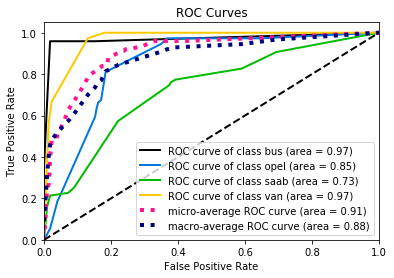

In [150]:
predicted_proba = clf.predict_proba(X_test)

plot_roc(y_test, predicted_proba)

Теперь обучим DecisionTreeClassifier на данных после применения PCA

In [151]:
tree = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 100))}

clf = GridSearchCV(estimator = tree, param_grid = params, n_jobs = -1)
clf.fit(X_train_pca, y_train)

best_tree_pca = clf.best_estimator_
print(best_tree_pca)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=82, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [152]:
y_pred = clf.predict(X_test_pca)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.6498316498316499
f1 =  0.6499245492431871


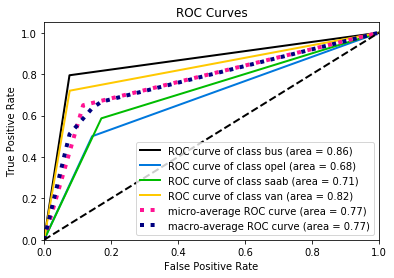

In [153]:
predicted_proba = clf.predict_proba(X_test_pca)

plot_roc(y_test, predicted_proba)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [155]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

Рассмотрим логистическую регрессию

(0.0, 1.0)

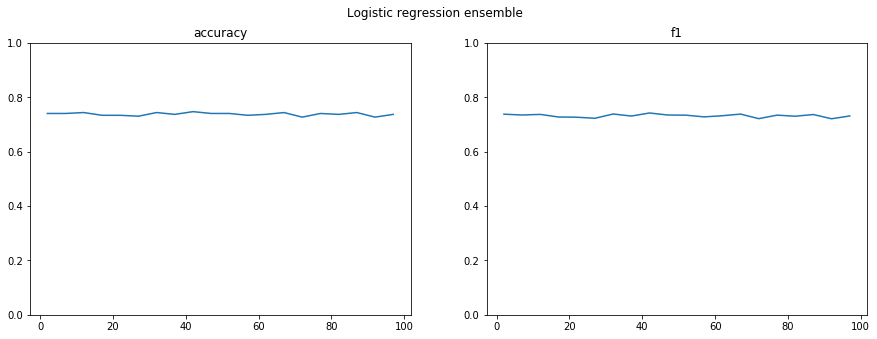

In [161]:
n_algorithms = list(range(2, 100, 5))
accuracy = []
f1 = []

for n in n_algorithms:
    clf = BaggingClassifier(n_estimators = n, base_estimator = best_log_reg_pca)
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Logistic regression ensemble')

ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax1.set_ylim((0.0, 1.0))

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')
ax2.set_ylim((0.0, 1.0))

Text(0.5, 1.0, 'f1')

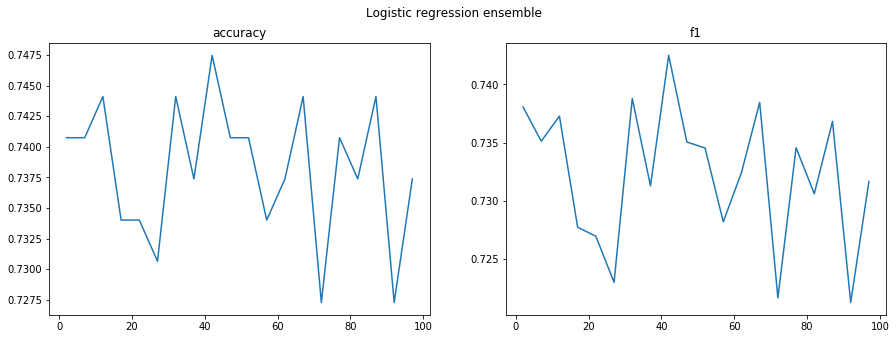

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Logistic regression ensemble')

ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')

Оптимальное количество алгоритмов для логистической регрессии примерно от 30 до 70

Рассмотрим решающие деревья

In [163]:
accuracy = []
f1 = []

for n in n_algorithms:
    clf = BaggingClassifier(n_estimators = n, base_estimator = best_tree_pca)
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

(0.0, 1.0)

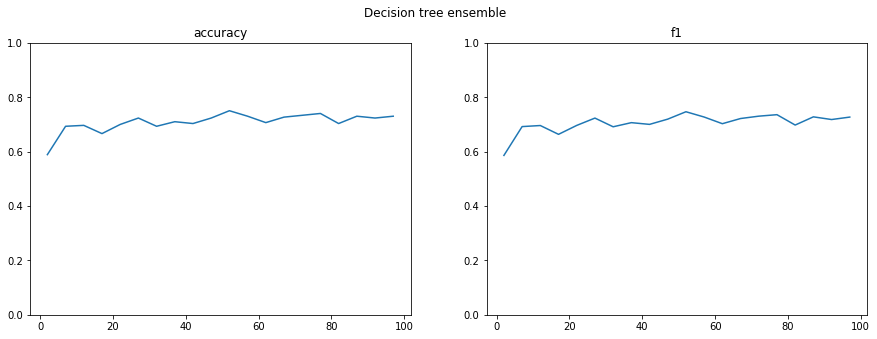

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Decision tree ensemble')

ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax1.set_ylim((0.0, 1.0))

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')
ax2.set_ylim((0.0, 1.0))

Text(0.5, 1.0, 'f1')

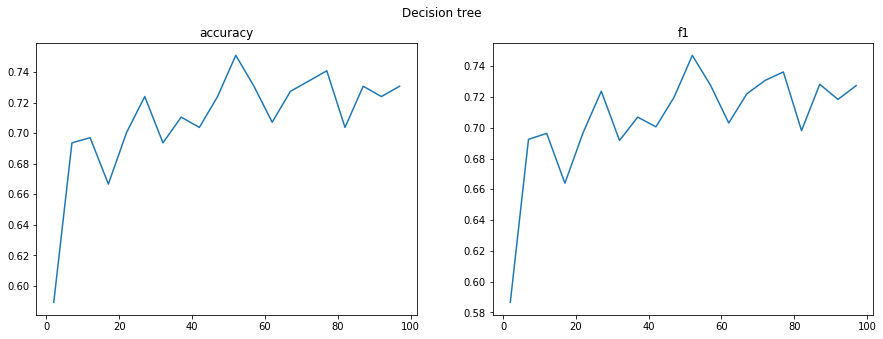

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Decision tree ensemble')

ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')

Оптимальное количество алгоритмов для решающих деревьев примерно от 40 до 100

Зависимости имеют большой шум, так что оценить оптимальное число более точно достаточно сложно

Я считаю, что мы можем использовать уже найденные оптимальные параметры, потому что тогда мы используем более подходящий гиперпараметр и bagging будет работать лучше

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [166]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
accuracy = []
f1 = []

for n in n_algorithms:
    clf = RandomForestClassifier(n_estimators = n)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

Text(0.5, 1.0, 'f1')

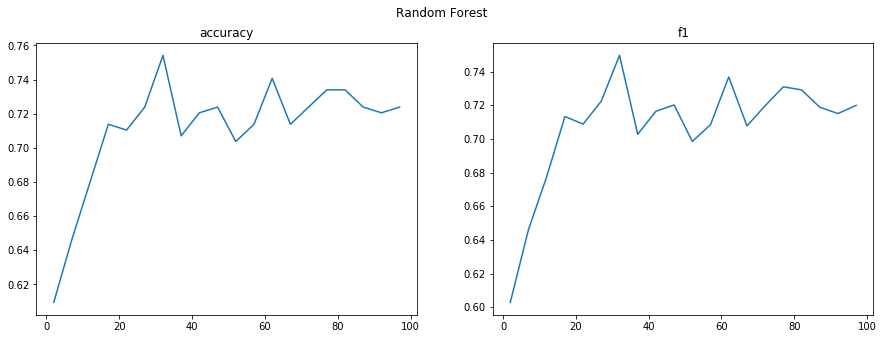

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Random Forest')
ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')

Оптимальное количество деревьев для random forest от 20 до 100, что немного отличается от bagging'а

Случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

Я думаю, что bagging требует большего числа алгоритмов, потому что в нем алгортмы полностью независимы

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [168]:
# YOUR CODE HERE
part_size = len(X_train) // 10 
models = [best_log_reg_pca, best_tree_pca, RandomForestClassifier(80)]

accuracy_arr = np.zeros((10, 3))
f1_arr = np.zeros((10, 3))

for i in range(10):
    X_train_split = X_train_pca[:min(part_size*(i+1), len(X_train))]
    y_train_split = y_train[:min(part_size*(i+1), len(X_train))]
    
    for m in range(len(models)):
        models[m].fit(X_train_split, y_train_split)
        y_pred = models[m].predict(X_test_pca)
        
        accuracy_arr[i, m] = accuracy_score(y_test, y_pred)
        f1_arr[i, m] = f1_score(y_test, y_pred, average='weighted')

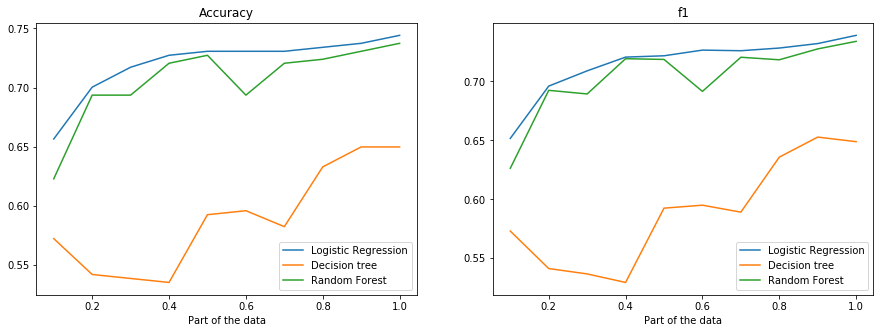

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

part = np.arange(1, 11) / 10

ax1.plot(part, accuracy_arr[:, 0], label = 'Logistic Regression')
ax1.plot(part, accuracy_arr[:, 1], label = 'Decision tree')
ax1.plot(part, accuracy_arr[:, 2], label = 'Random Forest')
ax1.set_xlabel('Part of the data')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(part, f1_arr[:, 0], label = 'Logistic Regression')
ax2.plot(part, f1_arr[:, 1], label = 'Decision tree')
ax2.plot(part, f1_arr[:, 2], label = 'Random Forest')
ax2.set_xlabel('Part of the data')
ax2.set_title('f1')
ax2.legend()

При увеличении тренировочной выборки сначала качество моделей улучшается, однако затем скорость роста уменьшается и качестов почти не изменяется. Decision tree на любом размере обучающей выборки показывает худший результат, однако у него рост качества при увеличении тренировочной выборки растет более заметно, чем у двух других моделей.